# Experiment 1 analyses

In [1]:
import os 
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

experiment_name = 'exp1'
iteration_name = 'pilot_local_2'

project_dir = os.path.abspath('../../')
data_dir = os.path.join(project_dir, 'data')
model_dir = os.path.join(data_dir, 'models')
behavior_dir = os.path.join(data_dir, 'behavioral_results', experiment_name, iteration_name)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [2]:
model_df = pd.read_csv(os.path.join(model_dir, 'model_results.csv'))
session_df = pd.read_csv(os.path.join(behavior_dir, 'session_data.csv'))
trial_df = pd.read_csv(os.path.join(behavior_dir, 'trial_data.csv'))

### Experiment descriptive analysis

### Model descriptive analysis

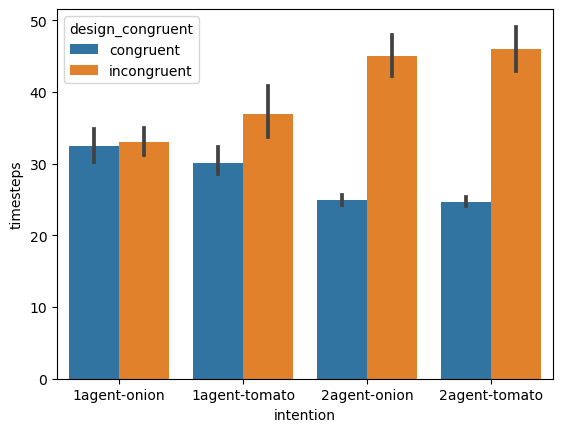

In [3]:
model_df['design_congruent_label'] = model_df['design_congruent'].map({True: 'congruent', False: 'incongruent'})
sns.barplot(data=model_df[~model_df.intention.str.contains('either')], 
            x='intention', 
            y='timesteps', 
            hue='design_congruent')
plt.show()

In [4]:
print(model_df.groupby(['intended_num_agents', 'intended_recipe', 'model_num_agents', 'model_recipe']).timesteps.mean(), '\n')

print(model_df.groupby(['intended_num_agents', 'model_num_agents']).timesteps.mean(), '\n')

print(model_df.groupby(['intended_recipe', 'model_recipe']).timesteps.mean(), '\n')

print(model_df.groupby(['model_num_agents', 'model_recipe']).timesteps.mean(), '\n')

print(model_df.groupby(['intended_num_agents', 'intended_recipe']).timesteps.mean())

intended_num_agents  intended_recipe  model_num_agents  model_recipe
1agent               either_recipe    1agent            onion           35.40
                                                        tomato          37.30
                                      2agent            onion           31.10
                                                        tomato          30.55
                     onion            1agent            onion           32.50
                                                        tomato          36.30
                                      2agent            onion           26.65
                                                        tomato          36.20
                     tomato           1agent            onion           37.70
                                                        tomato          30.10
                                      2agent            onion           45.90
                                                        tomato          2

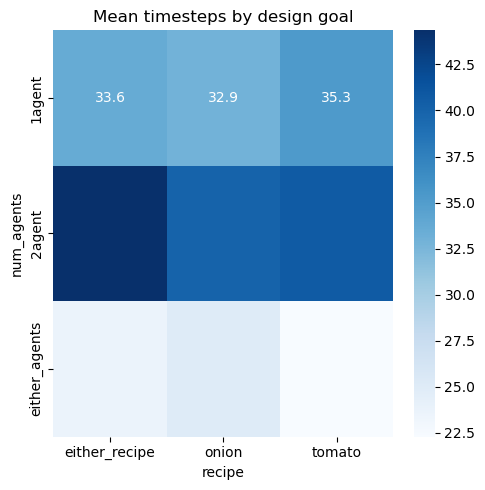

In [6]:
mean_table = model_df.pivot_table(
    index="intended_num_agents",
    columns="intended_recipe",
    values="timesteps",
    aggfunc="mean"
)

plt.figure(figsize=(5, 5))
sns.heatmap(mean_table, annot=True, fmt=".1f", cmap="Blues")
plt.title("Mean timesteps by design goal")
plt.ylabel("num_agents")
plt.xlabel("recipe")
plt.tight_layout()
plt.show()


### Model comparison

In [ ]:
df_full = ...